for running in google colab

In [1]:
!pip install -r ../requirements.txt

You should consider upgrading via the 'd:\persian_relation_extraction\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
# Import required packages
import numpy as np
import pandas as pd
import hazm
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

In [3]:
from persian_re.settings import BASE_PATH
from persian_re.preprocess import utils

In [4]:
BASE_PATH

WindowsPath('D:/persian_relation_extraction')

In [5]:
train_df,test_df = utils.load_raw_data()

In [6]:
df = pd.concat([train_df,test_df])
df.reset_index(inplace=True,drop=True)

In [7]:
df.head()

,id,text,re_type,comment
0,1,سیستمی که در بالا توضیح داده شد ٬ بزرگترین کار...,"Component-Whole(e2,e1)","Not a collection: there is structure here, or..."
1,2,<e1>کودک </e1>با دقت توسط بندی به <e2>گهواره <...,Other,| original: The child was carefully wrapped a...
2,3,<e1>نویسنده </e1>کی‌جن از یک <e2>اسمبلر </e2>ب...,"Instrument-Agency(e2,e1)",| original: The author of a keygen uses a dis...
3,4,یک <e1>کوهان </e1>مه‌گرفته از <e2>موج </e2>خرو...,Other,| original: A misty ridge uprises from the su...
4,5,<e2>انجمن <e1></e2>دانشجویی ، </e1>صدای جمعیت ...,"Member-Collection(e1,e2)",| original: The student association is the vo...


In [8]:
# print data information
print('data information')
print(df.info(), '\n')

# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10717 entries, 0 to 10716
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10717 non-null  int64 
 1   text     10717 non-null  object
 2   re_type  10717 non-null  object
 3   comment  10717 non-null  object
dtypes: int64(1), object(3)
memory usage: 335.0+ KB
None 

missing values stats
id         0
text       0
re_type    0
comment    0
dtype: int64 



duplicated rows:

In [9]:
df[df.duplicated('text')]

,id,text,re_type,comment


In [10]:
df['len_by_words'] = df['text'].apply(lambda x:len(hazm.word_tokenize(x)))

<AxesSubplot:xlabel='len_by_words', ylabel='Count'>

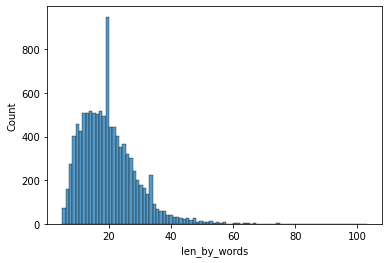

In [13]:
sns.histplot(df['len_by_words'])

# fig.update_layout(
#     title_text='Distribution of word counts within comments',
#     xaxis_title_text='',
#     yaxis_title_text='Frequency',
#     bargap=0.2,
#     bargroupgap=0.2)


In [18]:
np.quantile(df['len_by_words'],0.995)

53.0

so almost all the data can be covered in 64 tokens